In [1]:
import os
import pandas as pd
import networkx as nx
import numpy as np

os.chdir(os.path.dirname(os.path.abspath(__file__)))

In [2]:
# データの読み込み

In [3]:
# 1.工場データ
factories = pd.read_csv("input/tbl_factory.csv", index_col=0)
factories.head()

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北


In [4]:
# 2.倉庫データ
warehouses = pd.read_csv("input/tbl_warehouse.csv", index_col=0)
warehouses.head()

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北


In [5]:
# 3.コストデータ
cost = pd.read_csv("input/rel_cost.csv", index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [6]:
# 4.輸送実績
transactions = pd.read_csv("input/tbl_transaction.csv", index_col=0)
transactions.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [7]:
# 輸送実績に各データを結合する

In [8]:
# 1.コストデータを付与する
join_data = pd.merge(
    transactions,
    cost,
    how="left",
    left_on=["ToFC", "FromWH"],
    right_on=["FCID", "WHID"],
)
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [9]:
# 2.工場データを付与する
join_data = pd.merge(join_data, factories, how="left", on="FCID")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [10]:
# 3.倉庫データを付与する
join_data = pd.merge(join_data, warehouses, how="left", on="WHID")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北,山形倉庫,65,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北,郡山倉庫,60,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東,品川倉庫,41,関東


In [11]:
# 重複カラムを削除する
join_data.drop(columns=["FCID", "WHID"], inplace=True)
join_data.columns

Index(['TransactionDate', 'ToFC', 'FromWH', 'Quantity', 'Cost', 'FCName',
       'FCDemand', 'FCRegion', 'WHName', 'WHSupply', 'WHRegion'],
      dtype='object')

In [12]:
# 直感的にわかりやすい順にカラムを並び替える
join_data[
    [
        "TransactionDate",
        "Quantity",
        "Cost",
        "ToFC",
        "FCName",
        "FCDemand",
        "FCRegion",
        "FromWH",
        "WHName",
        "WHSupply",
        "WHRegion",
    ]
]
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,1.1,横須賀工場,25,関東,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,1.3,那須工場,25,東北,山形倉庫,65,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,0.9,山形工場,30,東北,郡山倉庫,60,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,0.8,東京工場,28,関東,品川倉庫,41,関東


In [13]:
# 関東支社と東北支社のデータのみのデータフレームを作成する

In [14]:
# 1.関東支社（倉庫が関東にある）データ
kanto = join_data[join_data["WHRegion"] == "関東"].copy()
kanto.head()

,TransactionDate,ToFC,FromWH,Quantity,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,1.1,横須賀工場,25,関東,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,FC00002,WH00003,18,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,0.8,東京工場,28,関東,品川倉庫,41,関東
7,2019-01-01 09:09:30,FC00001,WH00003,12,1.5,東京工場,28,関東,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,FC00003,WH00003,27,1.5,多摩工場,31,関東,豊洲倉庫,42,関東


In [15]:
# 2.東北支社(倉庫が東北にある)データ
tohoku = join_data[join_data["WHRegion"] == "東北"].copy()
tohoku.head()

,TransactionDate,ToFC,FromWH,Quantity,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,FC00007,WH00006,19,1.3,那須工場,25,東北,山形倉庫,65,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,0.9,山形工場,30,東北,郡山倉庫,60,東北
5,2019-01-01 08:56:09,FC00005,WH00005,31,0.3,仙台工場,21,東北,仙台倉庫,72,東北
6,2019-01-01 09:00:15,FC00006,WH00006,33,0.7,山形工場,30,東北,山形倉庫,65,東北
9,2019-01-01 14:12:51,FC00006,WH00006,21,0.7,山形工場,30,東北,山形倉庫,65,東北


In [16]:
# 現状の輸送量・コストの確認
# 1.総コスト実績
print(f'関東支社の総コスト:{kanto["Cost"].sum()}万円')
print(f'東北支社の総コスト:{tohoku["Cost"].sum()}万円')

関東支社の総コスト:2189.3万円
東北支社の総コスト:2062.0万円


In [17]:
# 2.総部品輸送個数実績
print(f'関東支社の総部品輸送個数:{kanto["Quantity"].sum()}個')
print(f'東北支社の総部品輸送個数:{tohoku["Quantity"].sum()}個')

関東支社の総部品輸送個数:49146個
東北支社の総部品輸送個数:50214個


In [18]:
# 3.輸送部品１つあたりの輸送コスト実績
print(f'関東支社の部品１つあたりの輸送コスト:{int(kanto["Cost"].sum()/kanto["Quantity"].sum()*10000)}円')
print(f'東北支社の部品１つあたりの輸送コスト:{int(tohoku["Cost"].sum()/tohoku["Quantity"].sum()*10000)}円')

関東支社の部品１つあたりの輸送コスト:445円
東北支社の部品１つあたりの輸送コスト:410円


In [19]:
# 4.各支社の倉庫→工場間の平均輸送コスト
cost_check = pd.merge(cost, factories, how="left", on="FCID")
print(f'関東支社の平均輸送コスト:{cost_check.loc[cost_check["FCRegion"]=="関東","Cost"].mean()}万円')
print(f'東北支社の平均輸送コスト:{cost_check.loc[cost_check["FCRegion"]=="東北","Cost"].mean()}万円')

関東支社の平均輸送コスト:1.075万円
東北支社の平均輸送コスト:1.05万円


In [20]:
# 各倉庫から工場への輸送ルートデータ読み込み
trans_route = pd.read_csv("input/trans_route.csv", index_col="工場")
trans_route.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [21]:
# 各輸送ルートの輸送量データを可視化する
# ノード座標の読み込み
trans_route_pos = pd.read_csv("input/trans_route_pos.csv")
trans_route_pos.head()

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


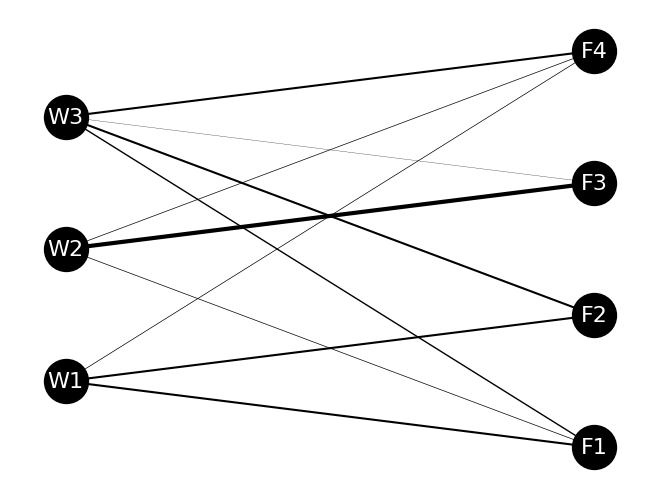

In [22]:
# グラフオブジェクトの作成
G = nx.Graph()

# ノード（頂点）の設定
for i in range(len(trans_route_pos.columns)):
    G.add_node(trans_route_pos.columns[i])

# エッジ（辺）の設定とエッジの重みのリスト化
edge_weights = []
size = 0.1

for i in range(len(trans_route.index)):
    warehouse = trans_route.index[i]

    for j in range(len(trans_route.columns)):
        # エッジの設定
        factory = trans_route.columns[j]
        G.add_edge(factory, warehouse)

        # エッジの重みのリスト化
        weight = trans_route.loc[warehouse, factory] * size
        edge_weights.append(weight)

# 座標の設定
pos = {}
for i in range(len(trans_route_pos.columns)):
    node = trans_route_pos.columns[i]
    pos[node] = (trans_route_pos.loc[0, node], trans_route_pos.loc[1, node])

# 描画
nx.draw(
    G,
    pos,
    with_labels=True,
    font_size=16,
    node_size=1000,
    node_color="k",
    font_color="w",
    width=edge_weights,
)

In [23]:
# 輸送コストを計算する関数を作成する
# 各倉庫から工場への輸送コストデータ読み込み
trans_cost = pd.read_csv("input/trans_cost.csv", index_col="工場")
trans_cost.head()

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [24]:
# 輸送コストを計算する関数
def calc_trans_cost(trans_route, trance_cost):
    cost = 0
    for i in range(len(trans_route.index)):
        for j in range(len(trans_route.columns)):
            warehouse = trans_route.index[i]
            factory = trans_route.columns[j]
            cost += (
                trance_cost.loc[warehouse, factory]
                * trans_route.loc[warehouse, factory]
            )
    return cost


print(f"総輸送コスト:{calc_trans_cost(trans_route, trans_cost)}")

総輸送コスト:1493


In [25]:
# 制約条件を作る
# 1.データの読み込み
# 1-1.各工場の最小生産数
factory_min_demand = pd.read_csv("input/demand.csv")
factory_min_demand

,F1,F2,F3,F4
0,28,29,31,25


In [26]:
# 1-2.各倉庫が供給可能な最大部品数
warehouse_max_supply = pd.read_csv("input/supply.csv")
warehouse_max_supply

,W1,W2,W3
0,35,41,42


In [27]:
# 2.工場側の制約条件(最小生産数を達成する)の作成
for i in range(len(factory_min_demand.columns)):
    factory = factory_min_demand.columns[i]
    min_demand = factory_min_demand.loc[0, factory]
    temp_sum = sum(trans_route.loc[:, factory])
    print(f"{factory}への輸送量:{temp_sum}, 最低生産数:{min_demand}")

    if temp_sum >= min_demand:
        print("最低生産数を満たしています。")
    else:
        print("最低生産数を満たしていません。輸送ルートの再計算が必要です。")

F1への輸送量:30, 最低生産数:28
最低生産数を満たしています。
F2への輸送量:30, 最低生産数:29
最低生産数を満たしています。
F3への輸送量:32, 最低生産数:31
最低生産数を満たしています。
F4への輸送量:25, 最低生産数:25
最低生産数を満たしています。


In [28]:
# 3.倉庫側の制約条件（供給可能部品数以下に抑える）の作成
for i in range(len(warehouse_max_supply.columns)):
    warehouse = warehouse_max_supply.columns[i]
    max_supply = warehouse_max_supply.loc[0, warehouse]
    temp_sum = sum(trans_route.loc[warehouse, :])
    print(f"{warehouse}の供給量:{temp_sum}, 上限供給可能部品数:{max_supply}")

    if temp_sum <= max_supply:
        print("上限供給可能部品数以下です。")
    else:
        print("上限供給可能部品数を超えています。輸送ルートの再計算が必要です。")

W1の供給量:35, 上限供給可能部品数:35
上限供給可能部品数以下です。
W2の供給量:40, 上限供給可能部品数:41
上限供給可能部品数以下です。
W3の供給量:42, 上限供給可能部品数:42
上限供給可能部品数以下です。


In [29]:
# 輸送ルートを変更して総輸送コストの変化を確認する
# 変更後ルートデータの読み込み
new_trans_route = pd.read_csv("input/trans_route_new.csv", index_col="工場")
new_trans_route

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [30]:
# 変更後ルートの総輸送コスト計算
print(f"総輸送コスト（変更後）:{calc_trans_cost(new_trans_route, trans_cost)}")

総輸送コスト（変更後）:1428


In [31]:
# 制約条件を満たしているかの確認
# 1.制約条件を確認する関数の作成
# 1-1.各工場の最小生産数を達成できるかを確認する関数の作成
def factory_min_demand_condition(trans_route, factory_min_demand):
    flag = np.zeros(len(factory_min_demand.columns))

    for i in range(len(factory_min_demand.columns)):
        factory = factory_min_demand.columns[i]
        min_demand = factory_min_demand.loc[0, factory]
        temp_sum = sum(trans_route.loc[:, factory])

        # 工場の最小生産数を達成できていればフラグを立てる
        if temp_sum >= min_demand:
            flag[i] = 1
    return flag


# 1-2.各倉庫の供給可能部品数以下に抑えられているかを確認する関数の作成
def warehouse_max_supply_condition(trans_route, warehouse_max_supply):
    flag = np.zeros(len(warehouse_max_supply.columns))

    for i in range(len(warehouse_max_supply.columns)):
        warehouse = warehouse_max_supply.columns[i]
        max_supply = warehouse_max_supply.loc[0, warehouse]
        temp_sum = sum(trans_route.loc[warehouse, :])

        # 倉庫の供給可能部品数以下に抑えられていればフラグを立てる
        if temp_sum <= max_supply:
            flag[i] = 1
    return flag

In [32]:
# 2.制約条件を満たしているかを確認する
print(
    f"各工場の最小生産数の達成確認結果(達成:1, 未達成:0): {factory_min_demand_condition(new_trans_route,factory_min_demand)}"
)
print(
    f"各倉庫の供給可能部品数以下の達成確認結果(達成:1, 未達成:0): {warehouse_max_supply_condition(new_trans_route,warehouse_max_supply)}"
)

各工場の最小生産数の達成確認結果(達成:1, 未達成:0): [1. 1. 1. 1.]
各倉庫の供給可能部品数以下の達成確認結果(達成:1, 未達成:0): [1. 0. 1.]
